# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

- if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
df = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
df.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [4]:
df.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [5]:
df["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

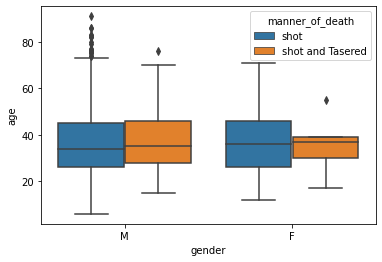

In [6]:
sns.boxplot(data = df, x = "gender", y = "age", hue = "manner_of_death");

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

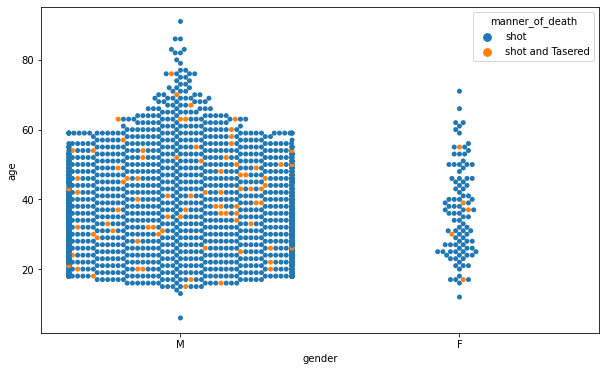

In [7]:
plt.figure(figsize = (10,6))
sns.swarmplot(data = df, x = "gender", y = "age", hue = "manner_of_death");

## 2: Plot 12 most dangerous cities

In [8]:
df[df.city == "Phoenix"].count()

id                         31
name                       31
date                       31
manner_of_death            31
armed                      31
age                        30
gender                     31
race                       28
city                       31
state                      31
signs_of_mental_illness    31
threat_level               31
flee                       31
body_camera                31
dtype: int64

In [9]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [10]:
df.city.value_counts().nlargest(12)

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

In [11]:
most_dangerous = df.city.value_counts().nlargest(12)

In [12]:
most_dangerous = pd.DataFrame(most_dangerous).reset_index()
most_dangerous

,index,city
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


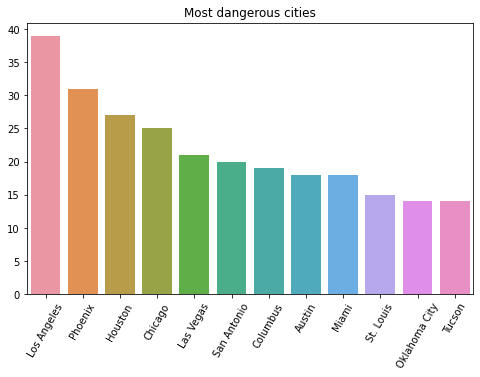

In [13]:
# with seaborn barplot
plt.figure(figsize = (8,5))
sns.barplot(data = most_dangerous, x = "index", y = "city")
plt.title("Most dangerous cities")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 60);

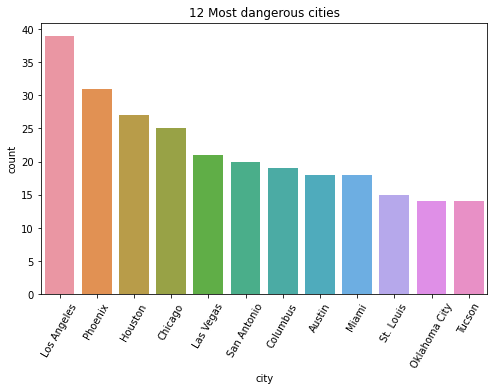

In [14]:
# with seaborn countplot
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = "city", order =  df.city.value_counts().nlargest(12).index)
plt.title("12 Most dangerous cities")
plt.xticks(rotation = 60);

## 3: Plot 20 most dangerous states

In [15]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [16]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [17]:
df.state.isnull().sum()

0

In [18]:
states = df.groupby('state')['city'].count()

In [19]:
states.nlargest(20)

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
Name: city, dtype: int64

In [20]:
md_states = df.state.value_counts().nlargest(20)

In [21]:
md_states = pd.DataFrame(md_states).reset_index()
md_states

,index,state
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


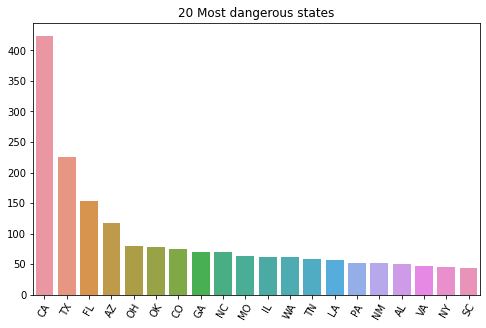

In [22]:
plt.figure(figsize = (8,5))
sns.barplot(data = md_states, x = "index", y = "state")
plt.title("20 Most dangerous states")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 60);

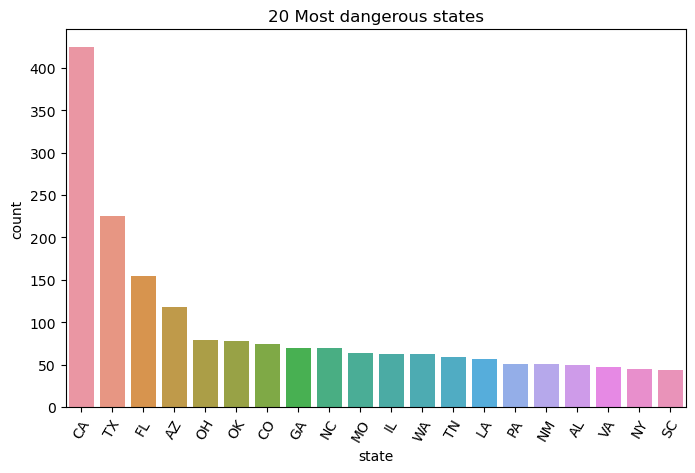

In [23]:
plt.figure(figsize = (8,5), dpi=100)
sns.countplot(data =df, x = "state" , order = df.state.value_counts().nlargest(20).index)
plt.title("20 Most dangerous states")
plt.xticks(rotation = 60);

## 4: Plot Having mental ilness or not for killed people

In [24]:
df[["signs_of_mental_illness"]].value_counts()

signs_of_mental_illness
False                      1902
True                        633
dtype: int64

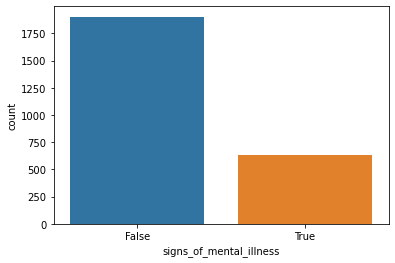

In [25]:
sns.countplot(x = "signs_of_mental_illness", data = df);

## 5: Plot number of Threat Types

In [26]:
df["threat_level"].value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

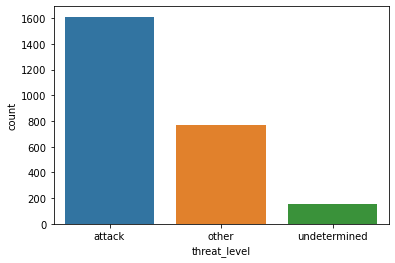

In [27]:
sns.countplot(x = "threat_level", data = df);

## 6: Plot number of Flee Types

In [28]:
df["flee"].value_counts()

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

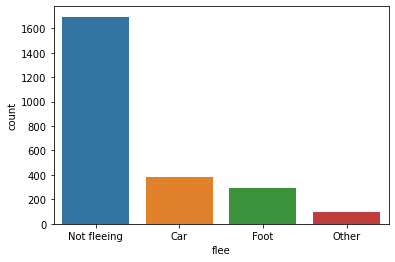

In [29]:
sns.countplot(x = "flee", data = df);